# Linear Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Data Collection

In [106]:
X = 2 * np.random.rand(100, 1)
y = 4 + 7 * X + np.random.randn(100,1)

## 2) Discovery and visualisation to gain Insight

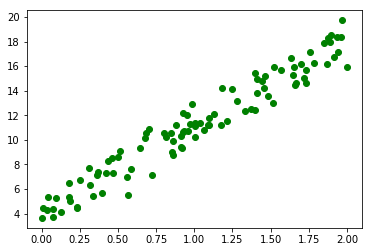

In [122]:
plt.plot(X,y,'go')
# plt.axis([0,2,0,14])
plt.show()

## 3) Data Preprocessing

In [111]:
X_b = (np.c_[np.ones((100, 1)),X])

## 4) Selecting Algo (Linear Regression) and Training ML Algo

In [112]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [113]:
theta_best

array([[4.17469571],
       [6.94073045]])

## 5) Fine Tuning 

## 6) Launch, Monitor and maintain your system (Make Predictions)

In [136]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [137]:
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [138]:
y_predict = X_new_b.dot(theta_best)

In [139]:
y_predict

array([[ 4.17469571],
       [18.05615661]])

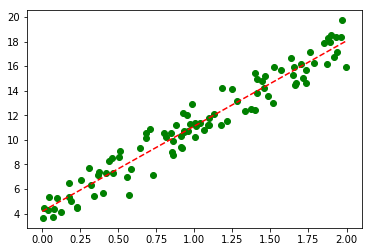

In [141]:
plt.plot(X,y,'go')
plt.plot(X_new, y_predict, "r--")
plt.show()

# Linear regression using Scikit Learn
<hr>
<br>

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lin_reg = LinearRegression()

In [144]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
lin_reg.intercept_, lin_reg.coef_

(array([4.17469571]), array([[6.94073045]]))

In [149]:
lin_reg.predict(X_new)

array([[ 4.17469571],
       [18.05615661]])

<br>

# Linear Regression using Batch Gradient Descent
<hr>
<br>

In [301]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [302]:
theta = np.random.randn(2,1) # random initialization
theta

array([[ 0.25438104],
       [-0.83099593]])

In [303]:
for i in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient
    

In [304]:
theta

array([[4.17469571],
       [6.94073045]])

<br>

# Linear Regression using Stochastic Gradient Descent
<hr>
<br>

In [305]:
n_epochs = 50
t0, t1 = 5, 50

In [307]:
def learning_schedule(t):
    return t0 / (t + t1)

In [308]:
theta = np.random.randn(2, 1) # Random Initialization

In [309]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient

In [310]:
theta

array([[4.08759963],
       [6.98700911]])

<br>

# Linear Regression SGD with scikit-learn
<hr>
<br>

In [311]:
from sklearn.linear_model import SGDRegressor

In [325]:
sgd_reg = SGDRegressor(max_iter=50,tol=0.19, penalty=None, eta0=0.1)

In [326]:
# y.ravel() # Flatens

In [327]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.19, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [328]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.36901404]), array([6.98331935]))

<br>

# Polynomial Regression
<hr>
<br>

In [330]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

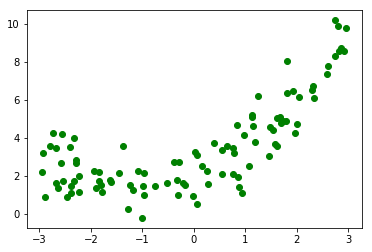

In [335]:
plt.plot(X, y, 'go')
plt.show()

In [336]:
from sklearn.preprocessing import PolynomialFeatures

In [363]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [364]:
X_poly = poly_features.fit_transform(X)

In [365]:
lin_reg = LinearRegression()

In [366]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [373]:
b_theta = (lin_reg.intercept_, lin_reg.coef_)

In [395]:
a = b_theta[1][0][1]
b = b_theta[1][0][0]
c = b_theta[0][0]

In [396]:
prediction_line = a * X**2 + b*X + c

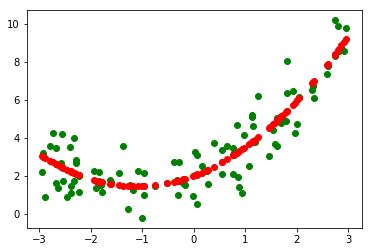

In [417]:
plt.plot(X, y, 'go')
plt.plot(X , prediction_line, 'ro')
plt.show()